## Tutorial 51

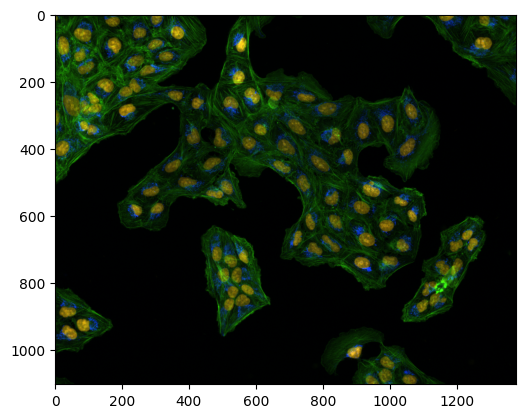

In [2]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""
Manual and auto thresholding
"""

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/Osteosarcoma_01.tif", 1)
plt.imshow(img)


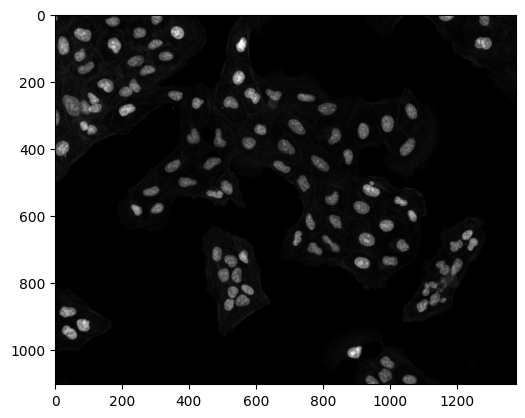

In [3]:
#########################MANUAL##################
#Separate blue channels as they contain nuclei pixels (DAPI). 
blue_channel = img[:,:,0]
plt.imshow(blue_channel, cmap='gray')

(array([8.12033e+05, 3.47050e+04, 5.59160e+04, 4.78370e+04, 1.07928e+05,
        5.22380e+04, 9.12130e+04, 3.66300e+04, 5.45780e+04, 2.04160e+04,
        2.91100e+04, 1.05070e+04, 1.52520e+04, 5.43100e+03, 7.99400e+03,
        2.90800e+03, 4.45800e+03, 1.71800e+03, 2.88400e+03, 1.21900e+03,
        2.06400e+03, 9.29000e+02, 1.64000e+03, 7.36000e+02, 1.44100e+03,
        6.95000e+02, 1.29000e+03, 6.56000e+02, 1.30700e+03, 6.35000e+02,
        1.31200e+03, 6.53000e+02, 1.44100e+03, 7.63000e+02, 1.62800e+03,
        8.89000e+02, 1.84300e+03, 1.05800e+03, 2.10500e+03, 1.09200e+03,
        2.30900e+03, 1.16800e+03, 2.50600e+03, 1.33500e+03, 2.73900e+03,
        1.33800e+03, 2.87900e+03, 1.51700e+03, 2.97600e+03, 1.54400e+03,
        3.05300e+03, 1.53600e+03, 3.21800e+03, 1.54400e+03, 3.26000e+03,
        1.61200e+03, 3.08900e+03, 1.53400e+03, 3.03700e+03, 1.50700e+03,
        2.88000e+03, 1.45900e+03, 2.75700e+03, 1.38100e+03, 2.67000e+03,
        1.33800e+03, 2.46900e+03, 1.16200e+03, 2.38

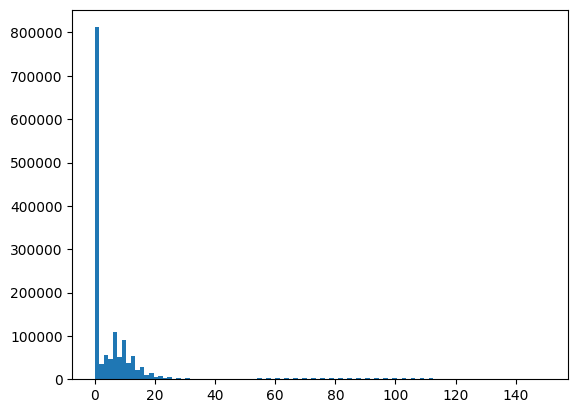

In [4]:
plt.hist(blue_channel.flat, bins=100, range=(0,150))  #.flat returns the flattened numpy array (1D)

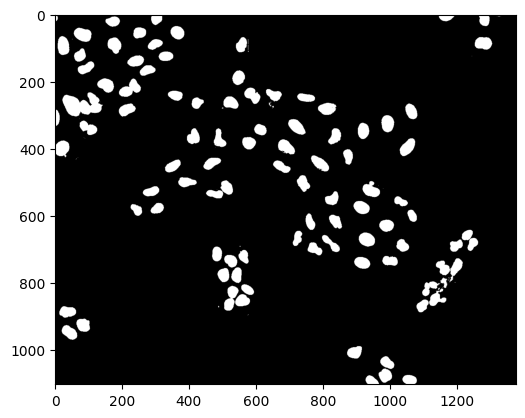

In [5]:
#Manual thresholding by setting threshold value to numpy array
#After thresholding we will get a binary image.
background = (blue_channel <= 40)
nuclei = (blue_channel > 40)
plt.imshow(nuclei, cmap='gray')

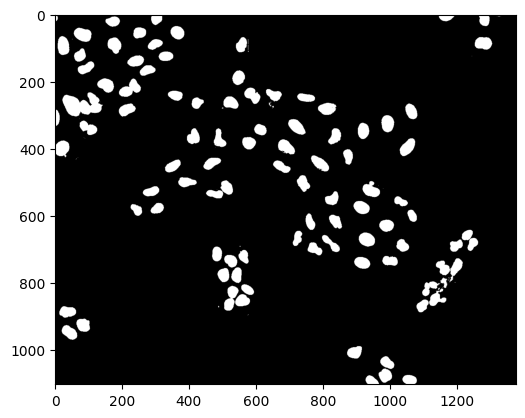

In [6]:
#Using opencv to perform manual threshold
#All pixels above 40 will have pixel value 255
#Should be exactly same as the above method. 
ret1, thresh1 = cv2.threshold(blue_channel, 40, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

######################################################

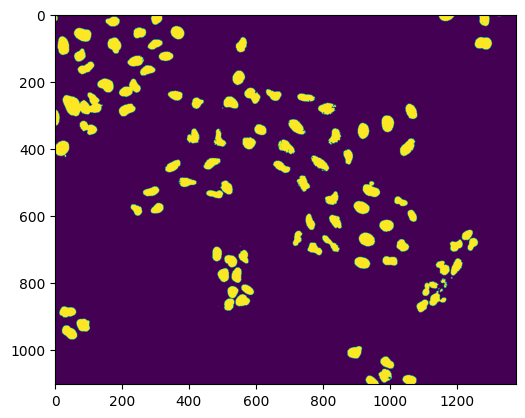

In [7]:
############# AUTO using OTSU ##########################
#Using opencv for otsu based automatic thresholding
ret2, thresh2 = cv2.threshold(blue_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#Reports a value of 50 as threshold for the nuclei.

#Now, let us segment the image, meaning assign values of 0, 1, 2, ... to pixels
import numpy as np 
#np.digitize needs bins to be defined as an array
#So let us convert the threshold value to an array
# #np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
#For binary it wold be 0 and 1. 
regions1=np.digitize(blue_channel, bins=np.array([ret2]))
plt.imshow(regions1)

####################################################################

## Tutorial 52

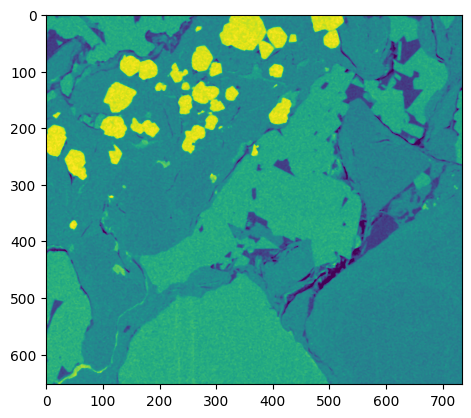

In [8]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

# Image segmentation and morphological operators

from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
import cv2


img = cv2.imread("images/BSE.tif", 0)
plt.imshow(img)

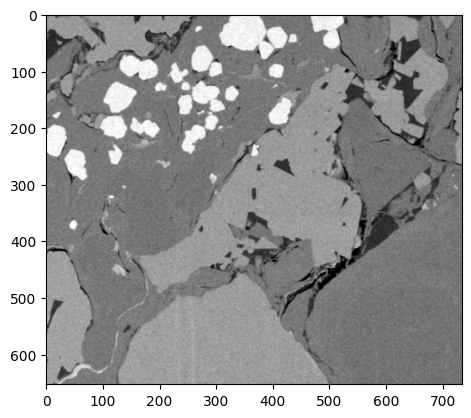

In [9]:
#Denoise for better results
from skimage.restoration import denoise_tv_chambolle
denoised_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, max_num_iter=200)
plt.imshow(img, cmap='gray')

(array([ 1503.,  4537.,  3200.,  4608.,  5865.,  7691.,  9625., 25963.,
            0., 33377., 18666., 19131., 36722.,     0., 31707., 13031.,
        10769.,  8827.,  6923.,  5264.,  7160.,  2595.,  1889.,  1722.,
         1539.,  3244.,     0.,  4418.,  3113.,  4053., 11409.,     0.,
        16772., 10292., 10680., 11360., 11665., 11160., 19404.,     0.,
        14149.,  5101.,  3961.,  4908.,     0.,  2600.,   669.,   518.,
          354.,   477.,   172.,   160.,   114.,   126.,   255.,     0.,
          267.,   142.,   134.,    87.,   123.,   204.,    84.,   122.,
           98.,   104.,   107.,   206.,     0.,   207.,   108.,   116.,
          256.,     0.,   244.,   137.,   140.,   138.,   166.,   170.,
          383.,   237.,   316.,   343.,   477.,  1422.,     0.,  2259.,
         1469.,  1623.,  3926.,     0.,  4171.,  1900.,  1763.,  1432.,
         1093.,   809.,  1017.,   603.]),
 array([100.  , 101.55, 103.1 , 104.65, 106.2 , 107.75, 109.3 , 110.85,
        112.4 , 113.95

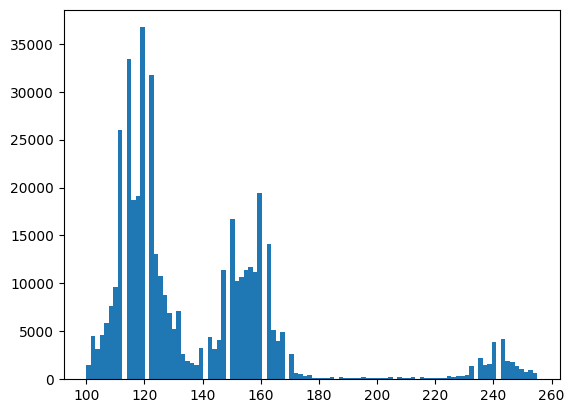

In [10]:
plt.hist(img.flat, bins=100, range=(100,255))  #.flat returns the flattened numpy array (1D)

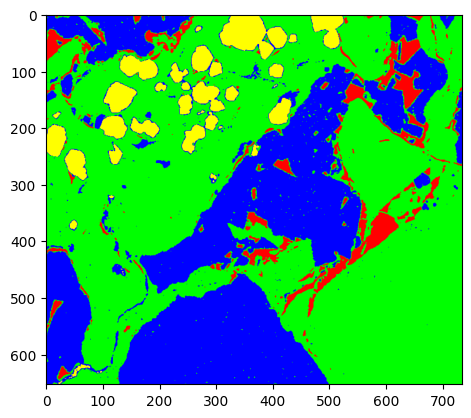

In [14]:
##################MANUAL########################
#Can perform manual segmentation but auto works fine
region1 = (img >= 0) & (img <75)
region2 = (img >= 75) & (img <140)
region3 = (img >= 140) & (img <200)
region4 = (img >= 200) & (img <=255)
all_regions = np.zeros((img.shape[0], img.shape[1], 3)) #Create 3 channel blank image of same size as original
all_regions[region1] = (1,0,0)
all_regions[region2] = (0,1,0)
all_regions[region3] = (0,0,1)
all_regions[region4] = (1,1,0)
plt.imshow(all_regions)
##############################################

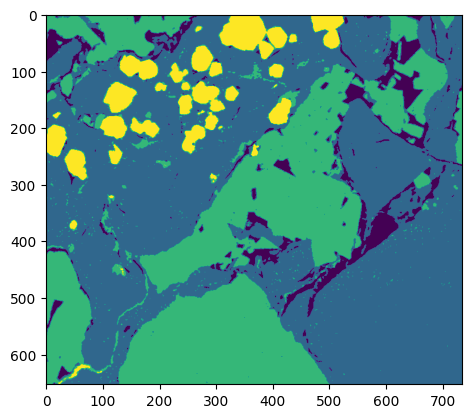

In [12]:
####AUTO###########################
# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=4)

# Digitize (segment) original image into multiple classes.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(img, bins=thresholds)
plt.imshow(regions)

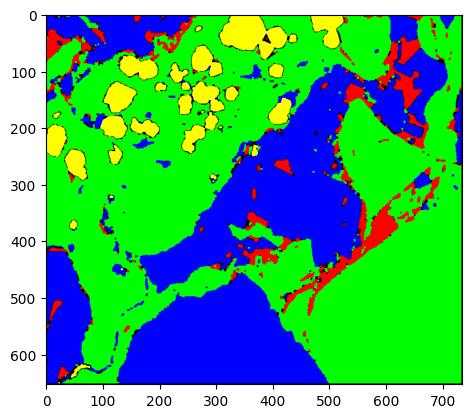

In [13]:
segm1 = (regions == 0)
segm2 = (regions == 1)
segm3 = (regions == 2)
segm4 = (regions == 3)

#We can use binary opening and closing operations to clean up. 
#Open takes care of isolated pixels within the window
#Closing takes care of isolated holes within the defined window

from scipy import ndimage as nd

segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3,3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((img.shape[0], img.shape[1], 3)) 

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

plt.imshow(all_segments_cleaned)  #All the noise should be cleaned now
#plt.imsave("images/BSE_segmented.jpg", all_segments_cleaned) 

## Tutorial 53

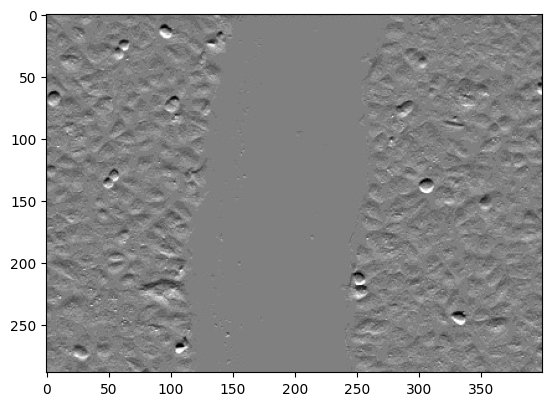

In [13]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

#Scratch Assay single image sgmentation

import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2

img = io.imread("images/scratch0.jpg", as_gray=True)
plt.imshow(img, cmap='gray')

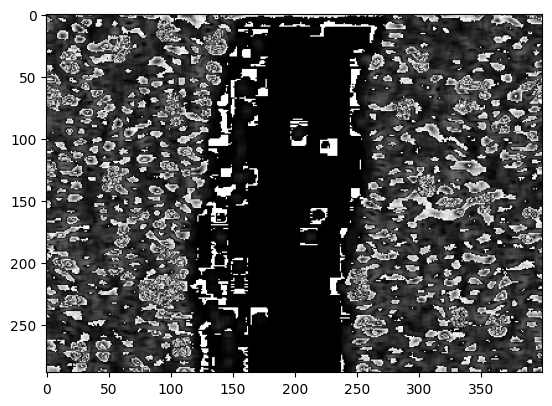

In [14]:
##################################################
#Variance - not a great way to quantify texture
from scipy import ndimage 
k=7
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

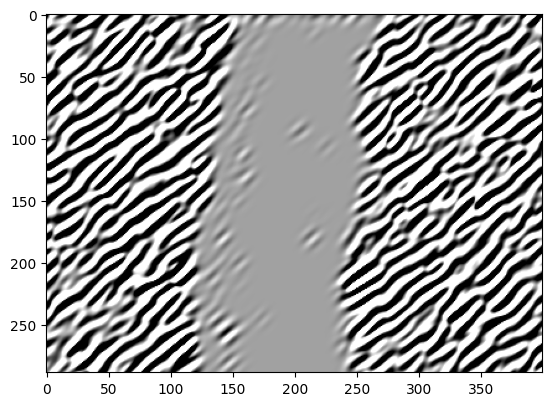

In [15]:
#######################################################
#GABOR - A great filter for texture but usually efficient
#if we know exact parameters. Good choice for generating features
#for machine learning

ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

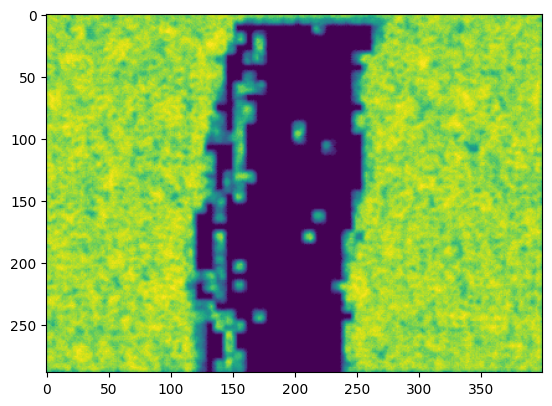

In [16]:
###########################################################
#Entropy
#Entropy quantifies disorder.
#Since cell region has high variation in pixel values the entropy would be
#higher compared to scratch region
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

(array([2.3356e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3040e+03,
        3.0000e+00, 3.0000e+00, 5.7000e+01, 1.7300e+02, 2.8000e+01,
        0.0000e+00, 1.6800e+02, 1.0800e+02, 9.5000e+01, 1.0000e+02,
        2.2000e+02, 9.1000e+01, 2.0700e+02, 1.5000e+02, 2.1100e+02,
        1.3100e+02, 1.4700e+02, 2.1400e+02, 4.2000e+01, 2.7600e+02,
        1.3600e+02, 1.5100e+02, 8.5000e+01, 1.2500e+02, 1.0100e+02,
        1.8700e+02, 1.4800e+02, 1.4900e+02, 1.5000e+02, 1.9700e+02,
        1.3500e+02, 1.7400e+02, 1.8200e+02, 1.7800e+02, 1.5900e+02,
        1.8400e+02, 1.8700e+02, 1.6500e+02, 1.7700e+02, 2.0300e+02,
        1.6800e+02, 1.8600e+02, 1.8200e+02, 2.0300e+02, 2.0500e+02,
        2.0800e+02, 2.2100e+02, 2.0900e+02, 1.9800e+02, 2.2900e+02,
        1.9700e+02, 2.5400e+02, 2.1000e+02, 2.2300e+02, 2.3700e+02,
        2.4200e+02, 2.6400e+02, 2.5300e+02, 2.8800e+02, 3.5200e+02,
        3.3300e+02, 4.7000e+02, 4.4400e+02, 5.7200e+02, 7.0400e+02,
        8.0200e+02, 9.9400e+02, 1.3900e+03, 1.46

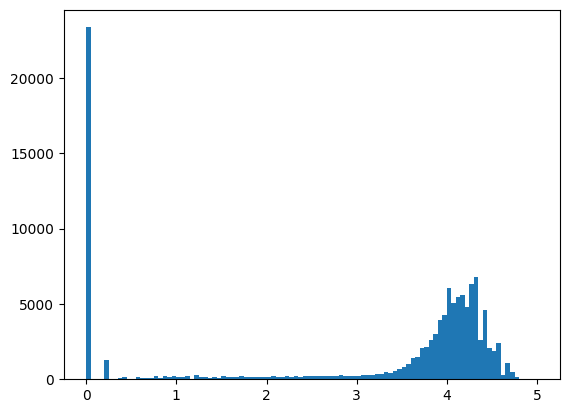

In [17]:
#Scratch Analysis - single image
#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)

Scratched area is:  29829 Square pixels
Scratched area in sq. microns is:  6040.3725 Square pixels


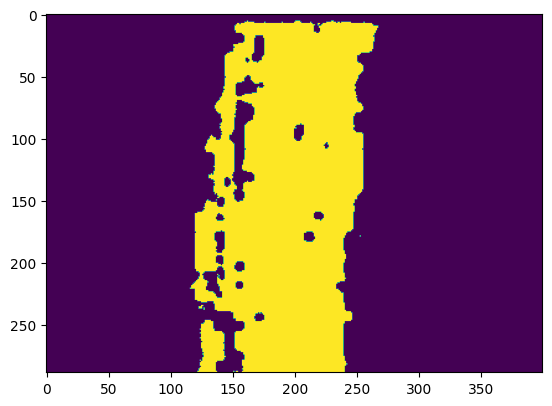

In [18]:
thresh = threshold_otsu(entropy_img)

#Now let us binarize the entropy image 
binary = entropy_img <= thresh
plt.imshow(binary)

#Sum all pixels in the scratch region (values =1)
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

## Tutorial 54

images/scratch_assay\scratch0.jpg time= 0 hr   Scratch area= 5958.5625 um²
images/scratch_assay\scratch1.jpg time= 1 hr   Scratch area= 4926.015 um²
images/scratch_assay\scratch2.jpg time= 2 hr   Scratch area= 4345.0425000000005 um²
images/scratch_assay\scratch3.jpg time= 3 hr   Scratch area= 3812.8725000000004 um²
images/scratch_assay\scratch4.jpg time= 4 hr   Scratch area= 3237.7725 um²
images/scratch_assay\scratch5.jpg time= 5 hr   Scratch area= 2798.145 um²
images/scratch_assay\scratch6.jpg time= 6 hr   Scratch area= 2458.755 um²
images/scratch_assay\scratch7.jpg time= 7 hr   Scratch area= 2133.7425000000003 um²
images/scratch_assay\scratch8.jpg time= 8 hr   Scratch area= 1730.97 um²
images/scratch_assay\scratch9.jpg time= 9 hr   Scratch area= 1519.1550000000002 um²
y =  -471.9906818181819 x  +  5416.061318181819
R² =  0.9661310307815387


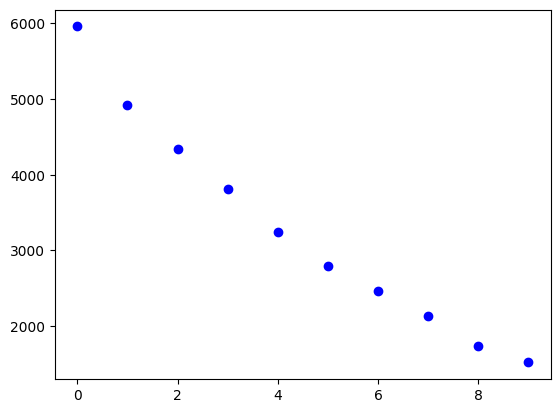

In [19]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

#Scratch Assay on time series images
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5154238/

import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu

#Use glob to extract image names and load them. 
import glob

time = 0
scale = 0.45 # microns/pixel
time_list=[]
area_list=[]
path = "images/scratch_assay/*.*"
image_list = glob.glob(path)
image_list.sort()

#Put the code from single image segmentation in af for loop
# to apply segmentaion to all images
for file in image_list:
    img=io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    scratch_area = scratch_area*((scale)**2)  #Convert to microns from pixel units
    print(file, "time=", time, "hr  ", "Scratch area=", scratch_area, "um\N{SUPERSCRIPT TWO}")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

#print(time_list, area_list)
plt.plot(time_list, area_list, 'bo')  #Print blue dots scatter plot

#Print slope, intercept
from scipy.stats import linregress #Linear regression
#print(linregress(time_list, area_list))

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ",slope, "x", " + ", intercept  )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)
#print("r-squared: %f" % r_value**2)

## Tutorial 55

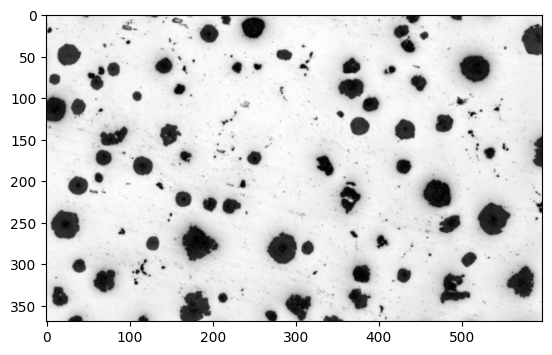

In [20]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""
Measure properties of labeled image regions.


https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops
https://github.com/scikit-image/scikit-image/blob/v0.17.2/skimage/measure/_regionprops.py#L643
"""

from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np

# The input image.
image = img_as_ubyte(rgb2gray(io.imread("images/cast_iron1.tif")))
plt.imshow(image, cmap='gray')

(array([8.12033e+05, 3.47050e+04, 5.59160e+04, 4.78370e+04, 1.07928e+05,
        5.22380e+04, 9.12130e+04, 3.66300e+04, 5.45780e+04, 2.04160e+04,
        2.91100e+04, 1.05070e+04, 1.52520e+04, 5.43100e+03, 7.99400e+03,
        2.90800e+03, 4.45800e+03, 1.71800e+03, 2.88400e+03, 1.21900e+03,
        2.06400e+03, 9.29000e+02, 1.64000e+03, 7.36000e+02, 1.44100e+03,
        6.95000e+02, 1.29000e+03, 6.56000e+02, 1.30700e+03, 6.35000e+02,
        1.31200e+03, 6.53000e+02, 1.44100e+03, 7.63000e+02, 1.62800e+03,
        8.89000e+02, 1.84300e+03, 1.05800e+03, 2.10500e+03, 1.09200e+03,
        2.30900e+03, 1.16800e+03, 2.50600e+03, 1.33500e+03, 2.73900e+03,
        1.33800e+03, 2.87900e+03, 1.51700e+03, 2.97600e+03, 1.54400e+03,
        3.05300e+03, 1.53600e+03, 3.21800e+03, 1.54400e+03, 3.26000e+03,
        1.61200e+03, 3.08900e+03, 1.53400e+03, 3.03700e+03, 1.50700e+03,
        2.88000e+03, 1.45900e+03, 2.75700e+03, 1.38100e+03, 2.67000e+03,
        1.33800e+03, 2.46900e+03, 1.16200e+03, 2.38

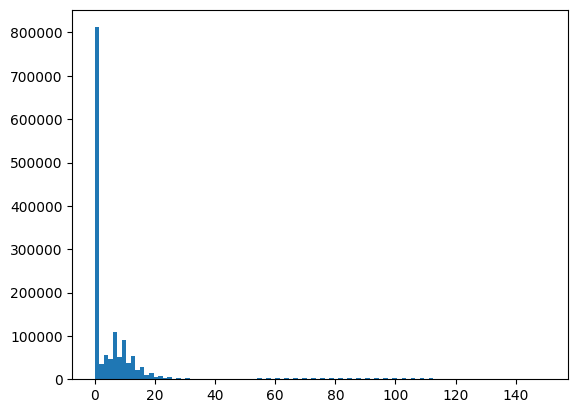

In [21]:
scale = 0.6 #microns/pixel

plt.hist(blue_channel.flat, bins=100, range=(0,150))  #.flat returns the flattened numpy array (1D)

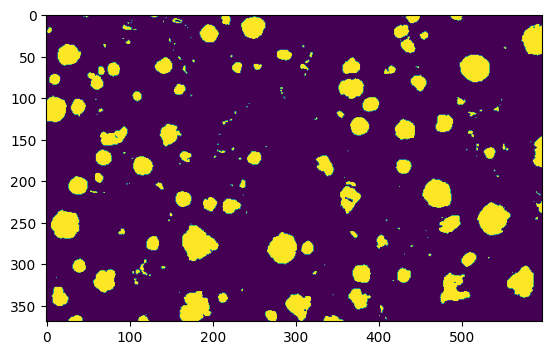

In [22]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)

#Generate thresholded image
thresholded_img = image < threshold
plt.imshow(thresholded_img)

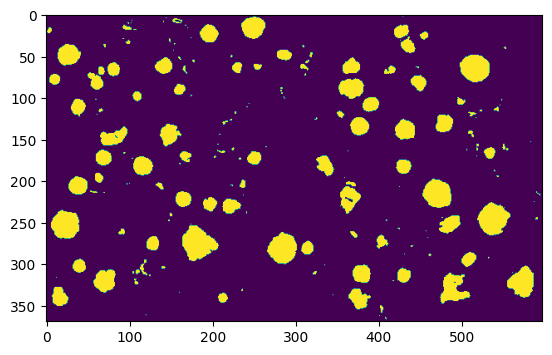

In [23]:
#Remove edge touching regions
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
plt.imshow(edge_touching_removed)

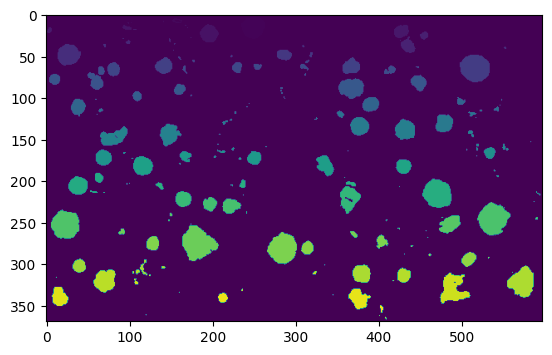

In [24]:
#Label connected regions of an integer array using measure.label
#Labels each connected entity as one object
#Connectivity = Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor. 
#If None, a full connectivity of input.ndim is used, number of dimensions of the image
#For 2D image it would be 2

label_image = measure.label(edge_touching_removed, connectivity=image.ndim)

plt.imshow(label_image)

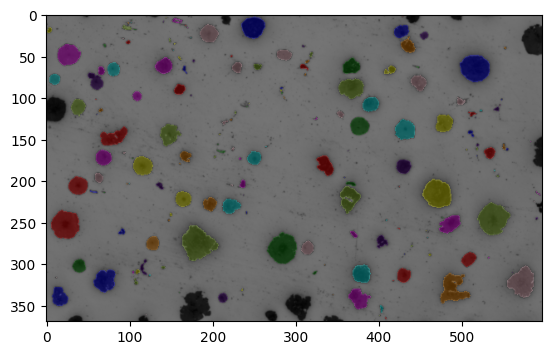

In [25]:
#Return an RGB image where color-coded labels are painted over the image.
#Using label2rgb

image_label_overlay = label2rgb(label_image, image=image)
plt.imshow(image_label_overlay)

#plt.imsave("labeled_cast_iron.jpg", image_label_overlay) 

In [26]:
#################################################
#Calculate properties
#Using regionprops or regionprops_table
all_props=measure.regionprops(label_image, image)
#Can print various parameters for all objects
for prop in all_props:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

Label: 1 Area: 1.0
Label: 2 Area: 587.0
Label: 3 Area: 1.0
Label: 4 Area: 40.0
Label: 5 Area: 1.0
Label: 6 Area: 2.0
Label: 7 Area: 3.0
Label: 8 Area: 1.0
Label: 9 Area: 366.0
Label: 10 Area: 44.0
Label: 11 Area: 2.0
Label: 12 Area: 226.0
Label: 13 Area: 31.0
Label: 14 Area: 1.0
Label: 15 Area: 4.0
Label: 16 Area: 71.0
Label: 17 Area: 220.0
Label: 18 Area: 1.0
Label: 19 Area: 2.0
Label: 20 Area: 8.0
Label: 21 Area: 19.0
Label: 22 Area: 1.0
Label: 23 Area: 3.0
Label: 24 Area: 548.0
Label: 25 Area: 10.0
Label: 26 Area: 6.0
Label: 27 Area: 6.0
Label: 28 Area: 1.0
Label: 29 Area: 186.0
Label: 30 Area: 17.0
Label: 31 Area: 6.0
Label: 32 Area: 936.0
Label: 33 Area: 9.0
Label: 34 Area: 303.0
Label: 35 Area: 304.0
Label: 36 Area: 8.0
Label: 37 Area: 13.0
Label: 38 Area: 198.0
Label: 39 Area: 122.0
Label: 40 Area: 56.0
Label: 41 Area: 45.0
Label: 42 Area: 25.0
Label: 43 Area: 93.0
Label: 44 Area: 66.0
Label: 45 Area: 6.0
Label: 46 Area: 253.0
Label: 47 Area: 5.0
Label: 48 Area: 138.0
Label: 49 

In [27]:
#Compute image properties and return them as a pandas-compatible table.
#Available regionprops: area, bbox, centroid, convex_area, coords, eccentricity,
# equivalent diameter, euler number, label, intensity image, major axis length, 
#max intensity, mean intensity, moments, orientation, perimeter, solidity, and many more

props = measure.regionprops_table(label_image, image, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label   area  equivalent_diameter  mean_intensity  solidity
0      1    1.0             1.128379       92.000000  1.000000
1      2  587.0            27.338464       19.701874  0.956026
2      3    1.0             1.128379       83.000000  1.000000
3      4   40.0             7.136496       64.625000  0.701754
4      5    1.0             1.128379       91.000000  1.000000


In [28]:
#To delete small regions...
df = df[df['area'] > 50]
print(df.head())

    label   area  equivalent_diameter  mean_intensity  solidity
1       2  587.0            27.338464       19.701874  0.956026
8       9  366.0            21.587165       32.696721  0.963158
11     12  226.0            16.963258       32.787611  0.945607
15     16   71.0             9.507892       49.253521  0.934211
16     17  220.0            16.736568       28.759091  0.897959


In [29]:
#######################################################
#Convert to micron scale
df['area_sq_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
print(df.head())

#df.to_csv('data/cast_iron_measurements.csv')

    label   area  equivalent_diameter  mean_intensity  solidity  \
1       2  587.0            27.338464       19.701874  0.956026   
8       9  366.0            21.587165       32.696721  0.963158   
11     12  226.0            16.963258       32.787611  0.945607   
15     16   71.0             9.507892       49.253521  0.934211   
16     17  220.0            16.736568       28.759091  0.897959   

    area_sq_microns  equivalent_diameter_microns  
1            211.32                    16.403078  
8            131.76                    12.952299  
11            81.36                    10.177955  
15            25.56                     5.704735  
16            79.20                    10.041941  


## Tutorial 56

Number of blobs detected are :  82


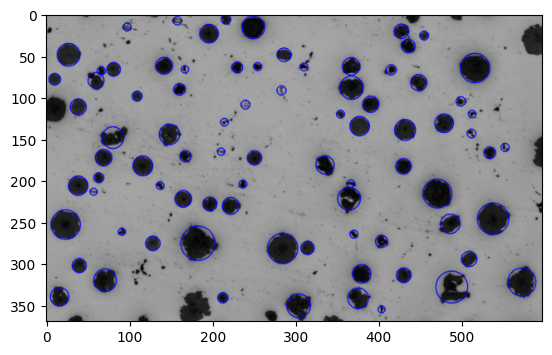

In [30]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""

https://www.learnopencv.com/blob-detection-using-opencv-python-c/

BLOB stands for Binary Large OBject and refers to a group of connected pixels in a binary image.
A Blob is a group of connected pixels in an image that share some common
property ( E.g grayscale value ). In the image above, the dark connected regions are blobs, 
and the goal of blob detection is to identify and mark these regions.

How it works:
    1. Threshold input images to binary.
    2. Grouping: connected white/black pixels are grouped together. 
    3. Merging: blobs located closer than minDistBetweenBlobs are merged.
    4. Center & Radius Calculation :  The centers and radii of the new merged blobs are computed and returned.
    
Can be filtered by color, size or shape

"""

import matplotlib.pyplot as plt
import numpy as np
import cv2

# The input image.
image = cv2.imread("images/cast_iron1.tif", 0)
#image = cv2.imread("images/Osteosarcoma_01_small.tif")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
#image=image[:,:,0] 

#No need to pre-threshold as blob detector has build in threshold.
#We can supply a pre-thresholded image.

# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Define thresholds
#Can define thresholdStep. See documentation. 
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 50
params.maxArea = 10000

# Filter by Color (black=0)
params.filterByColor = False  #Set true for cast_iron as we'll be detecting black regions
params.blobColor = 0

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5
params.maxConvexity = 1

# Filter by InertiaRatio
params.filterByInertia = True
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 1

# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print("Number of blobs detected are : ", len(keypoints))


# Draw blobs
img_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_blobs)
cv2.imshow("Keypoints", img_with_blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save result
#cv2.imwrite("particle_blobs.jpg", img_with_blobs)

## Tutorial 56b - Lembram da IP1 com as nanopartículas? :)

In [31]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""
Measure properties of labeled image regions.


https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops
https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghcircles
"""

import matplotlib.pyplot as plt
import numpy as np
import cv2

# The input image.
img = cv2.imread("images/cast_iron1.tif", 0)


img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

#cv2.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
#if dp=1 , the accumulator has the same resolution as the input image. 
#If dp=2 , the accumulator has half as big width and height.
#minDist – Minimum distance between the centers of the detected circles.
#minRadius – Minimum circle radius.
#maxRadius – Maximum circle radius.

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                            param1=50, param2=12, minRadius=10, maxRadius=20)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),1)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Tutorial 57

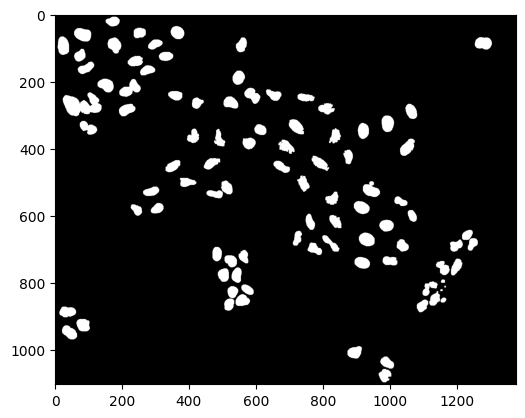

In [32]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

This code performs cell counting and size distribution analysis and dumps results into a csv file.
It uses watershed segmentation for better segmentation, separating touching nuclei.
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io


img = cv2.imread("images/Osteosarcoma_01.tif")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.


pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
plt.imshow(opening, cmap='gray') #This is our image to be segmented further using watershed

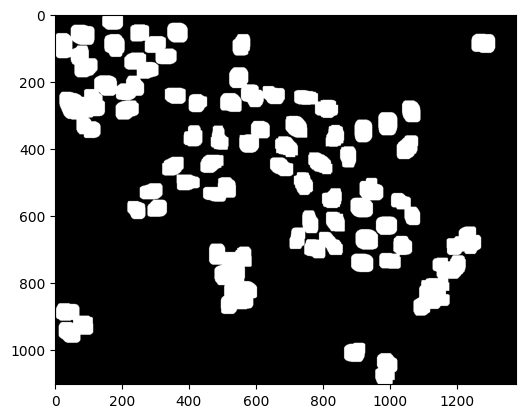

In [33]:
#Check the total regions found before and after applying this. 

#STEP 1: Sude background 
#Now we know that the regions at the center of cells is for sure cells
#The region far away is background.
#We need to extract sure regions. For that erode a few times. 
#But we have cells touching, so erode alone will not work. 
#To separate touching objects, the best approach would be distance transform and then thresholding.

# let us start by identifying sure background area
# dilating pixes a few times increases cell boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us. 
sure_bg = cv2.dilate(opening,kernel,iterations=10)
plt.imshow(sure_bg, cmap='gray') #Dark region is our sure background

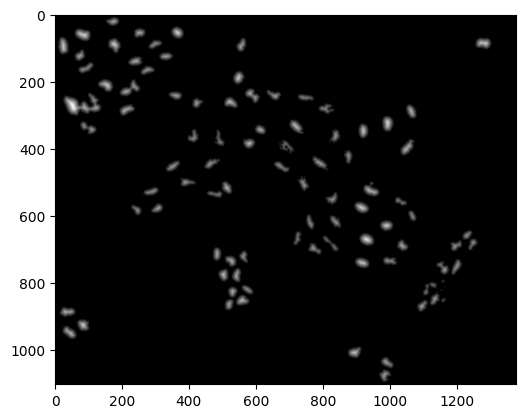

In [34]:

# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to 
#distance their respective distances from the closest 0 value (boundary).
#https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.imshow(dist_transform, cmap='gray') #Dist transformed img. 

21.968996


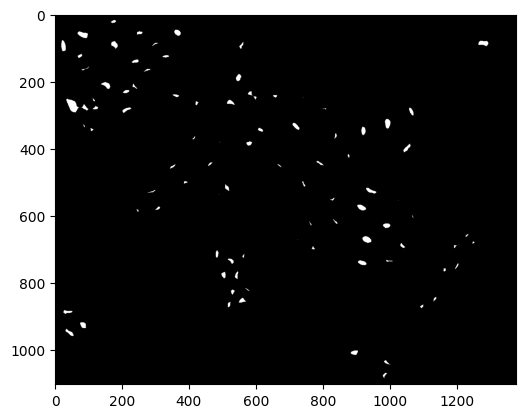

In [35]:
#Let us threshold the dist transform by starting at 1/2 its max value.
print(dist_transform.max()) #gives about 21.9
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')

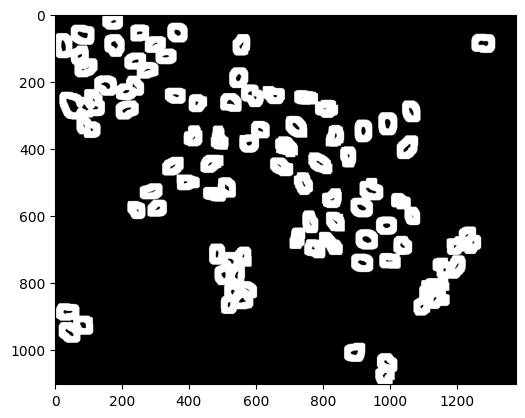

In [36]:
#Later you realize that 0.25* max value will not separate the cells well.
#High value like 0.7 will not recognize some cells. 0.5 seems to be a good compromize

# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)  #Convert to uint8 from float
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap='gray')

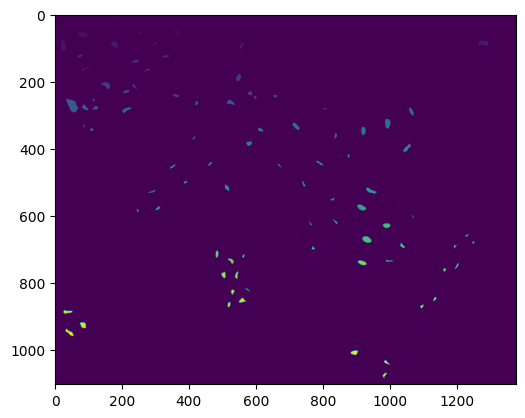

In [37]:
#Now we create a marker and label the regions inside. 
# For sure regions, both foreground and background will be labeled with positive numbers.
# Unknown regions will be labeled 0. 
#For markers let us use ConnectedComponents. 
#Connected components labeling scans an image and groups its pixels into components 
#based on pixel connectivity, i.e. all pixels in a connected component share 
#similar pixel intensity values and are in some way connected with each other. 
#Once all groups have been determined, each pixel is labeled with a graylevel 
# or a color (color labeling) according to the component it was assigned to.
ret3, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers)

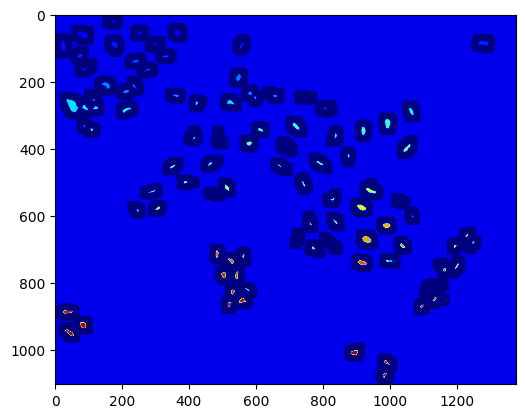

In [38]:

#One problem rightnow is that the entire background pixels is given value 0.
#This means watershed considers this region as unknown.
#So let us add 10 to all labels so that sure background is not 0, but 10
markers = markers+10

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers, cmap='jet')   #Look at the 3 distinct regions.

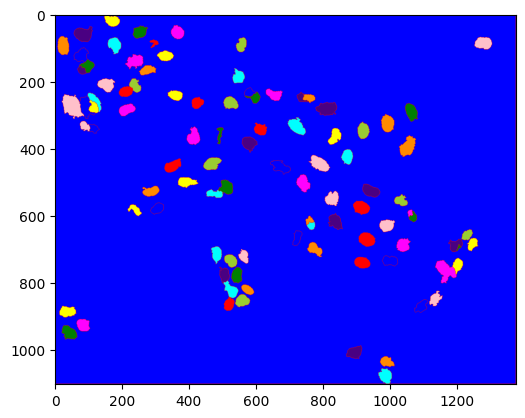

In [39]:
#Now we are ready for watershed filling. 
markers = cv2.watershed(img,markers)

#Let us color boundaries in yellow. 
#Remember that watershed assigns boundaries a value of -1
img[markers == -1] = [0,255,255]  

#label2rgb - Return an RGB image where color-coded labels are painted over the image.
img2 = color.label2rgb(markers, bg_label=0)

plt.imshow(img2)
cv2.imshow('Overlay on original image', img)
cv2.imshow('Colored Grains', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
#####################################################################################
#Now, time to extract properties of detected cells
#Directly capturing props to pandas dataframe
    
props = measure.regionprops_table(markers, cells, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity', 'orientation',
                                      'perimeter'])

import pandas as pd
df = pd.DataFrame(props)
print(df.head())

#To delete small regions...
df = df[df['area'] > 50]
print(df.head())

#######################################################
#Convert to micron scale
df['area_sq_microns'] = df['area'] * (pixels_to_um**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (pixels_to_um)
print(df.head())

#df.to_csv('data/cast_iron_measurements.csv')

   label       area  equivalent_diameter  mean_intensity  solidity  \
0     10  1400327.0          1335.272149        4.860480  0.924828   
1     11     1092.0            37.287767       80.092491  0.923858   
2     12     1142.0            38.131871      151.830998  0.955649   
3     13     1108.0            37.559944       78.256318  0.891392   
4     14     1670.0            46.111929      106.720359  0.862603   

   orientation     perimeter  
0    -1.499676  18900.592991  
1     1.282415    138.953319  
2     0.670516    132.296465  
3    -1.062275    146.852814  
4     1.532047    188.823376  
   label       area  equivalent_diameter  mean_intensity  solidity  \
0     10  1400327.0          1335.272149        4.860480  0.924828   
1     11     1092.0            37.287767       80.092491  0.923858   
2     12     1142.0            38.131871      151.830998  0.955649   
3     13     1108.0            37.559944       78.256318  0.891392   
4     14     1670.0            46.111929   

## Tutorial 58

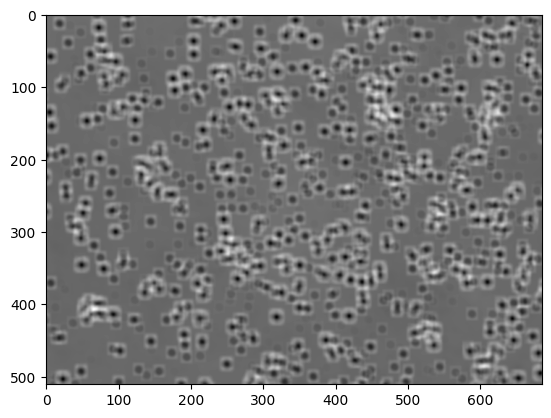

In [41]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""
OBJECT DETECTION WITH TEMPLATES

Need a source image and a template image.
The template image T is slided over the source image (as in 2D convolution), 
and the program tries to find matches using statistics.
Several comparison methods are implemented in OpenCV.
It returns a grayscale image, where each pixel denotes how much does the 
neighbourhood of that pixel match with template.

Once you got the result, you can use cv2.minMaxLoc() function 
to find where is the maximum/minimum value. Take it as the top-left corner of the 
rectangle and take (w,h) as width and height of the rectangle. 
That rectangle can be drawn on the region of matched template.
"""
### Template matching, single object in an image.
#Multiple methods to see which one works best. 

import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('images/Ti_powder.tif')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images/Ti_powder_single.tif', 0)
h, w = template.shape[::] 

#methods available: ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
# For TM_SQDIFF, Good match yields minimum value; bad match yields large values
# For all others it is exactly opposite, max value = good fit.
plt.imshow(res, cmap='gray')

In [42]:

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img_gray, top_left, bottom_right, 0, 1)  #Black rectangle with thickness 2. 

cv2.imshow("Matched image", img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

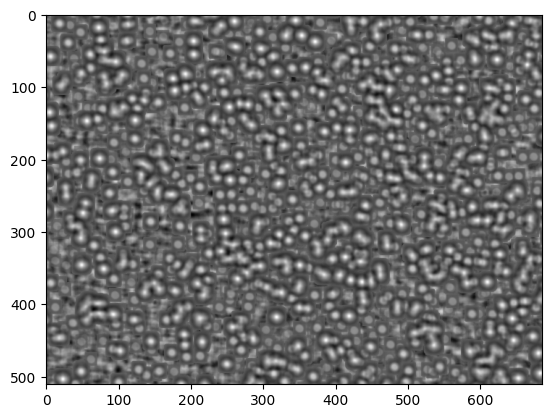

In [43]:

       
### Template matching - multiple objects

#For multiple occurances, cv2.minMaxLoc() won’t give all the locations
#So we need to set a threshold
    
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('images/Ti_powder.tif')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images/Ti_powder_single.tif',0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

In [44]:

threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

#Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
#then the second item and then third, etc. 

for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 1)  #Red rectangles with thickness 2. 

#cv2.imwrite('images/template_matched.jpg', img_rgb)
cv2.imshow("Matched image", img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

## Tutoriais 59 ao 65 são uma revisão de Pandas.<br>
Creio que não seja necessário, mas quem tiver interesse pode seguir no material dos vídeos e github.